This is an example

The pyflowline python package uses the OOP approach to manage configuration settings.
Set up the case object. We provide two options to set up a simulation case. First, from scratch (iFlag_option: 1); second, using a json file (iFlag_option = 2). For details of the json file format, please read the documentation.

In [9]:

from pathlib import Path
from pyflowline.case.pycase import flowlinecase
from pyflowline.case.pyflowline_read_model_configuration_file import pyflowline_read_model_configuration_file

iFlag_option = 2
print(iFlag_option)

if iFlag_option ==1:

    oPyflowline=flowlinecase()
    oPyflowline.iCase_index = 1


else: 
    if iFlag_option ==2:

        #an example configuration file is provided with the repository, but you need to update this file based on your own case study
        
        sFilename_configuration_in = str(Path.cwd()) +  '/pyflowline/config/pyflowline_susquehanna_hexagon_mac.json' 
        #sFilename_configuration_in = '/qfs/people/liao313/workspace/python/pyflowline/pyflowline/config/pyflowline_susquehanna_hexagon.json'
        print(sFilename_configuration_in)
        oPyflowline = pyflowline_read_model_configuration_file(sFilename_configuration_in)

        #print the case information in details
        print(oPyflowline)
        

        



2
/Users/liao313/workspace/python/pyflowline/pyflowline/config/pyflowline_susquehanna_hexagon_mac.json


After the case object was created, we can run the mainly three types of operations. 
First, we can preprocess the flowline.

Before the operation, we can visualize the original or raw flowline dataset. For most visualization, all you need to provide is a keyword, a look up table is provided in the documentation.
Be default, all the dataset will be converted to the WGS84 system to maintain consistency.

In [10]:
#pyflowline can process multiple basins within one singel run
#the total number of basin is controlled by the nOutlet variable
#convert the raw flowline into geojson in WGS84 system        
import os
from pyflowline.format.convert_shapefile_to_json import convert_shapefile_to_json
nOutlet = oPyflowline.nOutlet
for i in range(nOutlet):
    sBasin =  "{:03d}".format(i+1)    
    sWorkspace_output_basin = Path(oPyflowline.sWorkspace_output) / sBasin
    Path(sWorkspace_output_basin).mkdir(parents=True, exist_ok=True)                      
    pBasin = oPyflowline.aBasin[i]
    #the original flowline in shapefile format
    sFilename_raw = pBasin.sFilename_flowline_filter
    #the new flowine in geojson format in WGS84
    sFilename_out = pBasin.sFilename_flowline_filter_json
    convert_shapefile_to_json(sFilename_raw, sFilename_out)

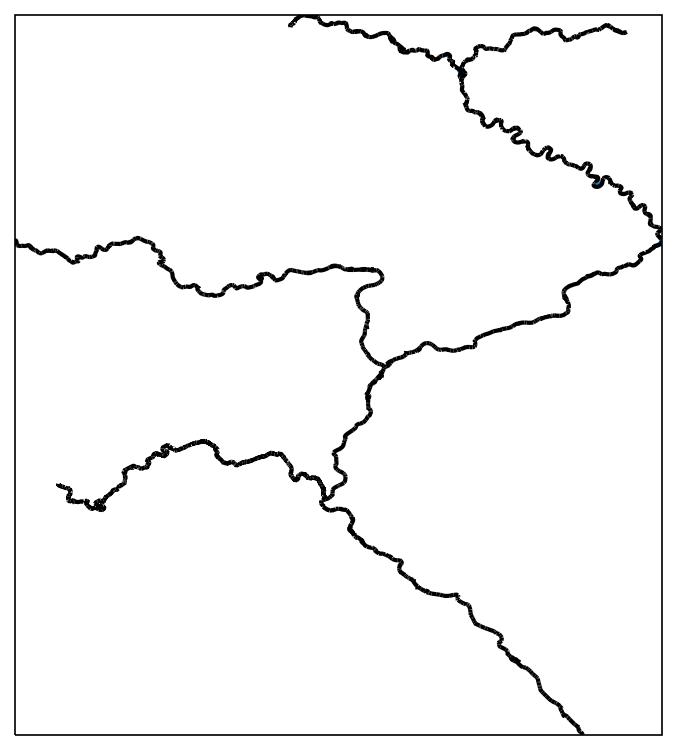

In [11]:
from pyflowline.plot.pyflowline_plot_flowline import pyflowline_plot_flowline
for i in range(nOutlet):
    pBasin = oPyflowline.aBasin[i]
    pyflowline_plot_flowline(pBasin, sVariable_in = 'flowline_filter_json') 

After the preprocess, we can visualize the final flowline 

In [ ]:
pyflowline_plot_flowline(oPyflowline, sVariable_in = 'flowline_simplified')

Second, we can creata a mesh

In [ ]:
from pyflowline.operation.create_mesh_op import create_mesh_op
aCell = create_mesh_op(oPyflowline)

We can also visualize the mesh:

In [ ]:
from pyflowline.plot.pyflowline_plot_mesh import pyflowline_plot_mesh
pyflowline_plot_mesh(oPyflowline)

Last, we can operate the intersect to generate desired flowlines. But we recommend that we run the intersect with some postprocess.

In [ ]:
from pyflowline.operation.intersect_flowline_with_mesh_with_postprocess_op import intersect_flowline_with_mesh_with_postprocess_op
intersect_flowline_with_mesh_with_postprocess_op(oPyflowline)

After this step, we can now visualize the final flowline again.

In [ ]:
pyflowline_plot_flowline(oPyflowline, sVariable_in = 'flowline_final')